# Imports and parameters

In [1]:
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt

from PerseusGammaCalibration import perseus_model_library
import minot

# Modify plotting parameters
dict_base = {'font.size':        16,
             'legend.fontsize':  16,
             'xtick.labelsize':  16,
             'ytick.labelsize':  16,
             'axes.labelsize':   16,
             'axes.titlesize':   16,
             'figure.titlesize': 16,    
             'figure.figsize':[8.0, 6.0],
             'figure.subplot.right':0.97,
             'figure.subplot.left':0.15,
             'font.family':'serif',
             'figure.facecolor': 'white',
             'legend.frameon': True}
plt.rcParams.update(dict_base)

# Define the models

In [2]:
# Reference model
C0 = perseus_model_library.default_model()

# Taylor direct measurement + 2/3 scaling
C1 = perseus_model_library.set_magnetic_field_model(C0, case='Taylor2006')

# Walker KHI
C2 = perseus_model_library.set_magnetic_field_model(C0, case='Walker2017')

# Bonafede 2010 + Coma scaling best
C3 = perseus_model_library.set_magnetic_field_model(C0, case='Bonafede2010best')

# Bonafede 2010 + Coma scaling LL
C4 = perseus_model_library.set_magnetic_field_model(C0, case='Bonafede2010low')

# Bonafede 2010 + Coma scaling UL
C5 = perseus_model_library.set_magnetic_field_model(C0, case='Bonafede2010up')

# Bonafede 2010 + Coma scaling 2/3
C6 = perseus_model_library.set_magnetic_field_model(C0, case='Bonafede2010std')

/Users/adam/Project/anaconda3/envs/fermi/lib/python2.7/site-packages/minot/model_modpar.py:1118: RuntimeWarning: divide by zero encountered in log10
  np.log10(user_p), kind='linear', fill_value='extrapolate')
/Users/adam/Project/anaconda3/envs/fermi/lib/python2.7/site-packages/scipy/interpolate/interpolate.py:571: RuntimeWarning: invalid value encountered in subtract
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


# Comparison

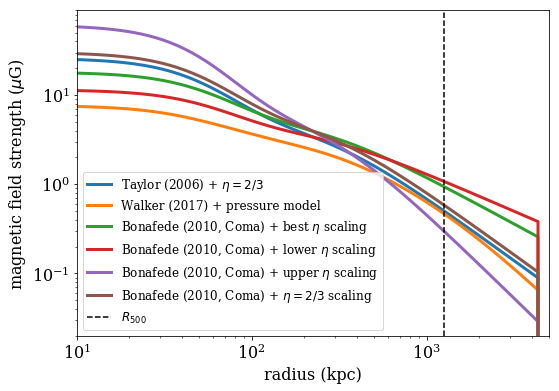

In [3]:
fig = plt.figure(0, figsize=(8, 6))
r, B = C1.get_magfield_profile()
plt.loglog(r,B, label=C1.name, linewidth=3)
r, B = C2.get_magfield_profile()
plt.loglog(r,B, label=C2.name, linewidth=3)
r, B = C3.get_magfield_profile()
plt.loglog(r,B, label=C3.name, linewidth=3)
r, B = C4.get_magfield_profile()
plt.loglog(r,B, label=C4.name, linewidth=3)
r, B = C5.get_magfield_profile()
plt.loglog(r,B, label=C5.name, linewidth=3)
r, B = C6.get_magfield_profile()
plt.loglog(r,B, label=C6.name, linewidth=3)
plt.axvline(C1.R500.to_value('kpc'), color='k', linestyle='--', label=r'$R_{500}$')
plt.xlabel('radius (kpc)')
plt.ylabel('magnetic field strength ($\\mu$G)')
plt.xlim(10,5000)
plt.legend(loc='lower left', fontsize=12)
plt.savefig(C0.output_dir+'/Magnetic_Field_Models.pdf')